In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo 

from sklearn.metrics import accuracy_score

## wine quality dataset
model wine quality, score between 0 and 10, based on physicochemical tests

https://archive.ics.uci.edu/dataset/186/wine+quality

#### load dataset

Number of observations: 6497
Number of features: 11
Number of target classes: 7
quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


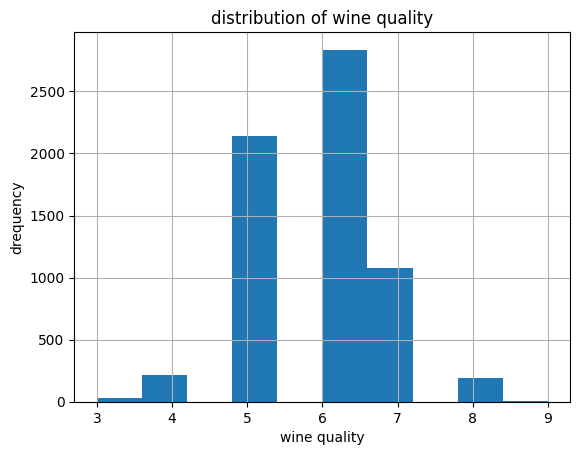

In [2]:
# fetch dataset 
wine_quality_data = fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
wine_quality_X = wine_quality_data.data.features 
wine_quality_y = wine_quality_data.data.targets 
  
# metadata 
#print(wine_quality_data.metadata) 
  
# variable information 
#print(wine_quality_data.variables) 

wine_quality_y = pd.Series(wine_quality_y['quality'], name='quality')
wine_quality_y.value_counts()
wine_quality_y.hist()
plt.xlabel('wine quality')
plt.ylabel('drequency')
plt.title('distribution of wine quality')


# num of observations
num_observations = len(wine_quality_X)
print(f'Number of observations: {num_observations}')

# num of features
num_features = len(wine_quality_X.columns)
print(f'Number of features: {num_features}')

# number of target classes
num_classes = len(wine_quality_y.unique())
print(f'Number of target classes: {num_classes}')

# distribution of target variable
print(wine_quality_y.value_counts())

In [3]:
# change target class to 3 classes: bad, medium and good
wine_quality_y = wine_quality_y.map({3: 'Bad', 4: 'Bad', 5: 'Medium', 6: 'Medium', 7: 'Good', 8: 'Good', 9: 'Good'})
print(wine_quality_y.value_counts())
print("unique values in target variable:", wine_quality_y.unique())

quality
Medium    4974
Good      1277
Bad        246
Name: count, dtype: int64
unique values in target variable: ['Medium' 'Good' 'Bad']


In [4]:
categorical_columns = wine_quality_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    wine_quality_X[col] = wine_quality_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {wine_quality_X[col].unique()}")
    
mapping = {1: 'Bad', 2: 'Medium', 3: 'Good'}

K = 3  # number of classes

Categorical columns: []


#### CAIM & 1ook

Number of observations after SMOTE:  11154
Number of classes after SMOTE:  3
Target distribution after SMOTE:  quality
Medium    3718
Good      3718
Bad       3718
Name: count, dtype: int64
testing parameters: {'C': 1000.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5920749809552716
testing parameters: {'C': 100.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5921646670539262
testing parameters: {'C': 10.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5918956489579166
testing parameters: {'C': 2.5}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5923439588513265
testing parameters: {'C': 1.6666666666666667}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5923439588513266
testing parameters: {'C': 1.1111111111111112}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5927921883448273
testing parameters: {'C': 1.0101010101010102}
  fold  1
  fold  2
  fold  3
  fold  4
  fo

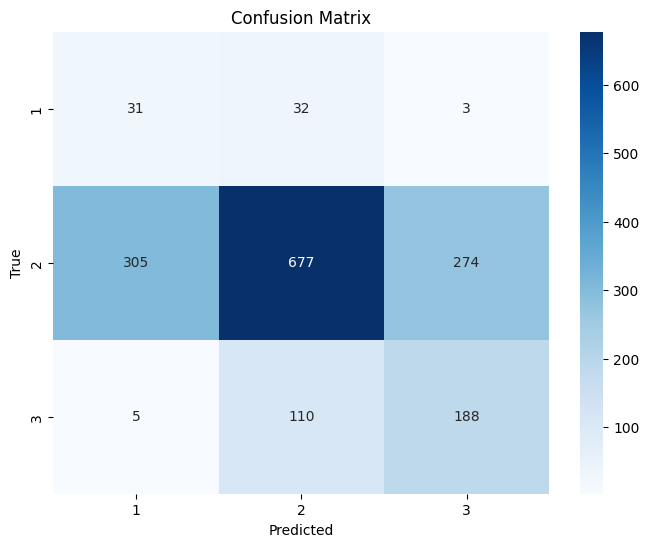

accuracy for class 1: 0.470
accuracy for class 2: 0.539
accuracy for class 3: 0.620

Evaluating the model on the train set...
accuracy on train set:  0.5934194011117088
precision on train set:  0.617539480716973
recall on train set:  0.5934194011117088
f1 score on train set:  0.6010750973521262
balanced accuracy on train set:  0.5934194011117088
logistic loss on train set:  0.09283954894396675
mse on train set:  0.4579523041061503

Scorecard table:
                 Feature                                         Bin    Points
0          fixed_acidity      [7.40051494526765, 10.303001959862065[ -0.432584
1          fixed_acidity                  [10.303001959862065, 15.6[  0.780417
2       volatile_acidity                  [0.08, 0.2295787693295491[  0.851184
3       volatile_acidity                 [0.42000542173916977, 1.58[ -0.693618
4            citric_acid                  [0.0, 0.25976141936694946[ -0.544141
5            citric_acid  [0.25976141936694946, 0.47988985870079043[  0.0

In [5]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_ml_model, wine_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  11154
Number of classes after SMOTE:  3
Target distribution after SMOTE:  quality
Medium    3718
Good      3718
Bad       3718
Name: count, dtype: int64
testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5952128688094582
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5892957168958399
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5889372941008577
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5853518601523982
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5732494226281524
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5676904523097889
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

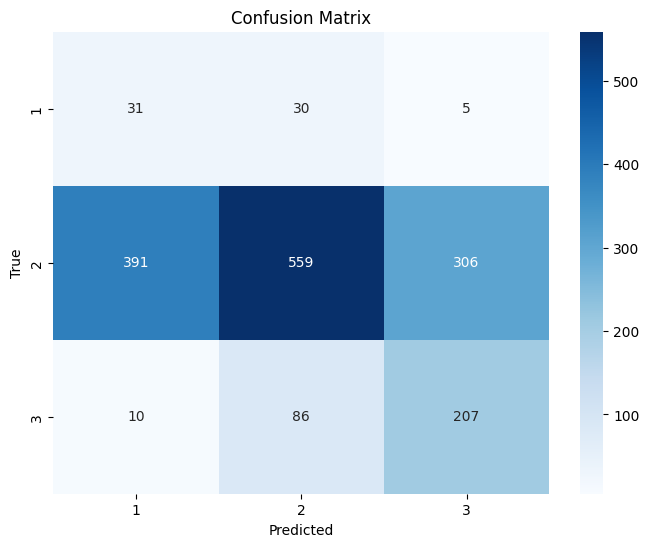

accuracy for class 1: 0.470
accuracy for class 2: 0.445
accuracy for class 3: 0.683

Evaluating the model on the train set...
accuracy on train set:  0.603191680114757
precision on train set:  0.6009914026015651
recall on train set:  0.603191680114757
f1 score on train set:  0.6020103406783838
balanced accuracy on train set:  0.6031916801147571
logistic loss on train set:  0.09805434850823931
mse on train set:  0.4944414559799175

Scorecard table:
                 Feature                                         Bin    Points
0          fixed_acidity                     [3.8, 7.40051494526765[  0.057594
1          fixed_acidity      [7.40051494526765, 10.303001959862065[ -0.196388
2          fixed_acidity                  [10.303001959862065, 15.6[  0.136841
3          fixed_acidity                                 [15.6, inf[  0.001953
4       volatile_acidity                  [0.08, 0.2295787693295491[  0.349392
5       volatile_acidity   [0.2295787693295491, 0.42000542173916977[ -0.03

In [6]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_mm_model, wine_caim_1ook_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                    K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  11154
Number of classes after SMOTE:  3
Target distribution after SMOTE:  quality
Medium    3718
Good      3718
Bad       3718
Name: count, dtype: int64
Execution time: 459.2631139755249 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              3           3
1              2           1
2              3           3
3              2           2
4              2           2
...          ...         ...
1620           2           1
1621           3           3
1622           3           2
1623           1           1
1624           2           2

[1625 rows x 2 columns]
accuracy:  0.5692307692307692
precision:  0.7283473504428442
recall:  0.5692307692307692
f1 score:  0.6186591617835773
balanced accuracy:  0.5320595753842899
logistic loss:  0.03890523220635434
mse:  0.44184615384615383
number of far off predictions:  14
number of features:  45
number of non-zero weights:  15
model size (non-zero weights / all weights)

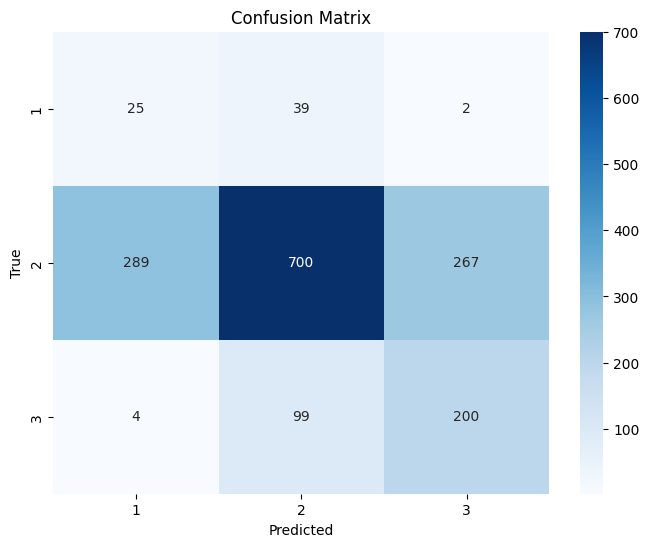

accuracy for class 1: 0.379
accuracy for class 2: 0.557
accuracy for class 3: 0.660

Evaluating the model on the train set...
accuracy on train set:  0.598708983324368
precision on train set:  0.6197886189184628
recall on train set:  0.598708983324368
f1 score on train set:  0.6049108019177927
balanced accuracy on train set:  0.598708983324368
logistic loss on train set:  0.09016995598987167
mse on train set:  0.45508337816030126

Scorecard table:
                 Feature                                        Bin    Points
0          fixed_acidity                    [3.8, 7.40051494526765[  0.080050
1       volatile_acidity  [0.2295787693295491, 0.42000542173916977[ -0.122861
2       volatile_acidity                [0.42000542173916977, 1.58[ -0.224705
3            citric_acid                 [0.0, 0.25976141936694946[ -0.110071
4              chlorides               [0.009, 0.04305672250545402[  0.051269
5    free_sulfur_dioxide                   [1.0, 18.95344275464502[ -0.243706
6 

In [7]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_beyondl1_model, wine_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                    K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  11154
Number of classes after SMOTE:  3
Target distribution after SMOTE:  quality
Medium    3718
Good      3718
Bad       3718
Name: count, dtype: int64
testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5916261484624522
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5916261484624522
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5916261484624522
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5916261484624522
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
AdaptiveLasso infeasible: minimize 2.8017482909335424e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 1.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 1.00]] @ var901 + -[1. 0. 1. ... 1.

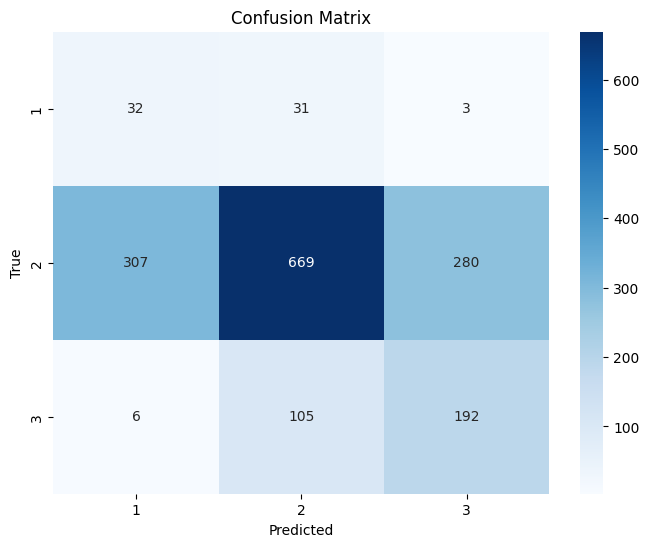

accuracy for class 1: 0.485
accuracy for class 2: 0.533
accuracy for class 3: 0.634

Evaluating the model on the train set...
accuracy on train set:  0.6000537923614847
precision on train set:  0.6204954784538336
recall on train set:  0.6000537923614847
f1 score on train set:  0.6069448544701584
balanced accuracy on train set:  0.6000537923614847
logistic loss on train set:  0.09358766794458794
mse on train set:  0.44970414201183434

Scorecard table:
                 Feature                                         Bin    Points
0          fixed_acidity                     [3.8, 7.40051494526765[  0.028753
1          fixed_acidity      [7.40051494526765, 10.303001959862065[ -0.034503
2          fixed_acidity                  [10.303001959862065, 15.6[  0.161239
3          fixed_acidity                                 [15.6, inf[  0.163347
4       volatile_acidity                  [0.08, 0.2295787693295491[  0.229425
5       volatile_acidity   [0.2295787693295491, 0.42000542173916977[  0

In [8]:
start_time = time.time()

scorecard = Scorecard()   
wine_caim_1ook_adaptivelasso_model, wine_caim_1ook_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

Number of observations after SMOTE:  11154
Number of classes after SMOTE:  3
Target distribution after SMOTE:  quality
Medium    3718
Good      3718
Bad       3718
Name: count, dtype: int64
testing parameters: {'C': 1000.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5920749809552716
testing parameters: {'C': 100.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5922543531525809
testing parameters: {'C': 10.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5922543933525355
testing parameters: {'C': 2.5}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5924337253498904
testing parameters: {'C': 1.6666666666666667}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5927923089446909
testing parameters: {'C': 1.1111111111111112}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5929716409420458
testing parameters: {'C': 1.0101010101010102}
  fold  1
  fold  2
  fold  3
  fold  4
  fo

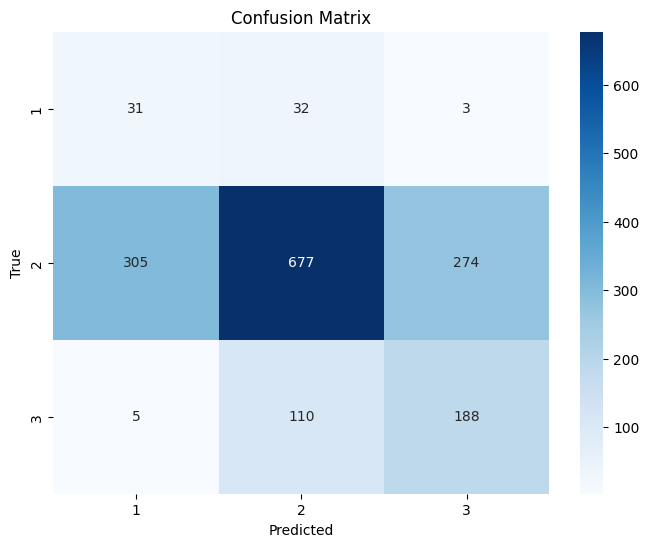

accuracy for class 1: 0.470
accuracy for class 2: 0.539
accuracy for class 3: 0.620

Evaluating the model on the train set...
accuracy on train set:  0.5950331719562488
precision on train set:  0.6189709005224083
recall on train set:  0.5950331719562488
f1 score on train set:  0.6026785733044532
balanced accuracy on train set:  0.5950331719562488
logistic loss on train set:  0.09319551527754932
mse on train set:  0.45499372422449347

Scorecard table:
                 Feature                                         Bin    Points
0          fixed_acidity                     [3.8, 7.40051494526765[ -0.073263
1          fixed_acidity      [7.40051494526765, 10.303001959862065[ -0.430777
2          fixed_acidity                  [10.303001959862065, 15.6[  1.211799
3       volatile_acidity                  [0.08, 0.2295787693295491[ -0.058138
4       volatile_acidity   [0.2295787693295491, 0.42000542173916977[ -0.852690
5       volatile_acidity                 [0.42000542173916977, 1.58[ -0

In [9]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_ml_model, wine_caim_diffcod_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  11154
Number of classes after SMOTE:  3
Target distribution after SMOTE:  quality
Medium    3718
Good      3718
Bad       3718
Name: count, dtype: int64
testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5932395736392817
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5880401517146285
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5902816609817231
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5866960260334906
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5839174051733321
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5702006580732564
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

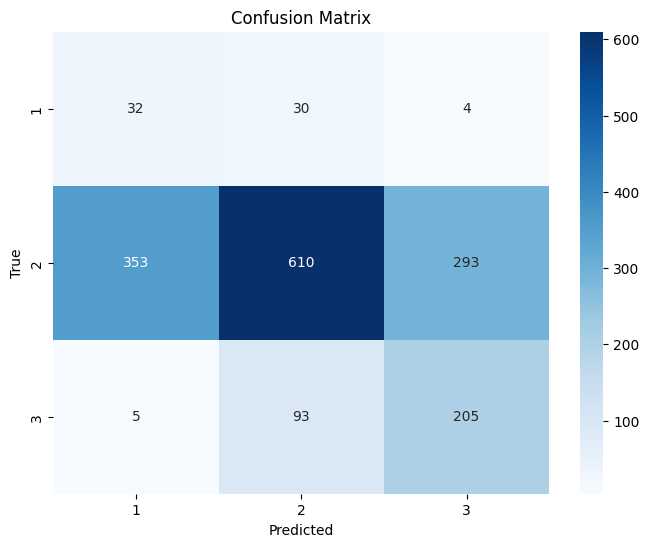

accuracy for class 1: 0.485
accuracy for class 2: 0.486
accuracy for class 3: 0.677

Evaluating the model on the train set...
accuracy on train set:  0.6048054509592972
precision on train set:  0.6110598093554972
recall on train set:  0.6048054509592972
f1 score on train set:  0.6073954922847906
balanced accuracy on train set:  0.6048054509592972
logistic loss on train set:  0.09548483045263007
mse on train set:  0.47830374753451677

Scorecard table:
                 Feature                                         Bin  \
0          fixed_acidity                     [3.8, 7.40051494526765[   
1          fixed_acidity      [7.40051494526765, 10.303001959862065[   
2          fixed_acidity                  [10.303001959862065, 15.6[   
3          fixed_acidity                                 [15.6, inf[   
4       volatile_acidity                  [0.08, 0.2295787693295491[   
5       volatile_acidity   [0.2295787693295491, 0.42000542173916977[   
6       volatile_acidity                 

In [10]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_mm_model, wine_caim_diffcod_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  11154
Number of classes after SMOTE:  3
Target distribution after SMOTE:  quality
Medium    3718
Good      3718
Bad       3718
Name: count, dtype: int64
Execution time: 470.1857018470764 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              3           3
1              2           1
2              3           3
3              2           2
4              2           1
...          ...         ...
1620           2           1
1621           3           3
1622           3           2
1623           1           1
1624           2           2

[1625 rows x 2 columns]
accuracy:  0.564923076923077
precision:  0.7287892766133198
recall:  0.564923076923077
f1 score:  0.6155496372494763
balanced accuracy:  0.5389373332237682
logistic loss:  0.040197972556055776
mse:  0.4461538461538462
number of far off predictions:  15
number of features:  45
number of non-zero weights:  13
model size (non-zero weights / all weights): 

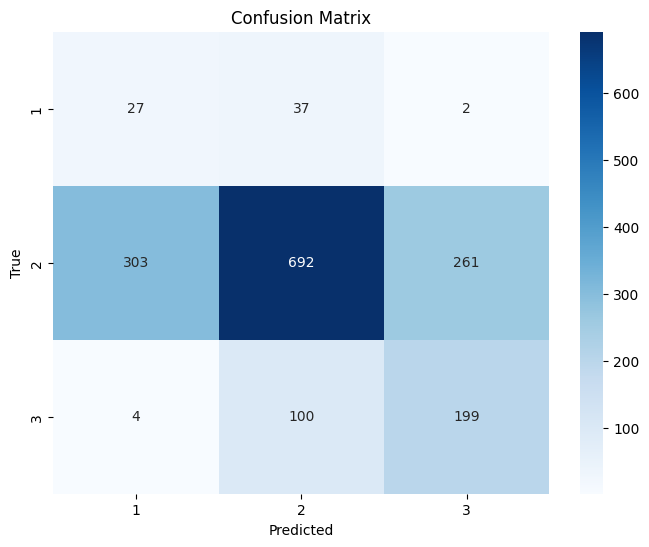

accuracy for class 1: 0.409
accuracy for class 2: 0.551
accuracy for class 3: 0.657

Evaluating the model on the train set...
accuracy on train set:  0.5909987448448987
precision on train set:  0.6127445289950799
recall on train set:  0.5909987448448987
f1 score on train set:  0.597815843823939
balanced accuracy on train set:  0.5909987448448987
logistic loss on train set:  0.09101930355905606
mse on train set:  0.4617177694100771

Scorecard table:
                 Feature                                         Bin    Points
0          fixed_acidity      [7.40051494526765, 10.303001959862065[ -0.068770
1       volatile_acidity   [0.2295787693295491, 0.42000542173916977[ -0.122921
2       volatile_acidity                 [0.42000542173916977, 1.58[ -0.104084
3            citric_acid  [0.25976141936694946, 0.47988985870079043[  0.112450
4              chlorides  [0.04305672250545402, 0.05102975833995701[ -0.051913
5    free_sulfur_dioxide      [18.95344275464502, 48.95264910077277[  0.2

In [11]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_beyondl1_model, wine_caim_diffcod_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  11154
Number of classes after SMOTE:  3
Target distribution after SMOTE:  quality
Medium    3718
Good      3718
Bad       3718
Name: count, dtype: int64
testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5918055206597617
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5918055206597617
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5918055206597617
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5918055206597617
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
AdaptiveLasso infeasible: minimize 2.8017482909335424e-05 @ quad_over_lin([[1.00 0.00 ... 0.00 0.00]
 [1.00 0.00 ... 0.00 1.00]
 ...
 [1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 0.00 1.00]] @ var3241 + -[1. 0

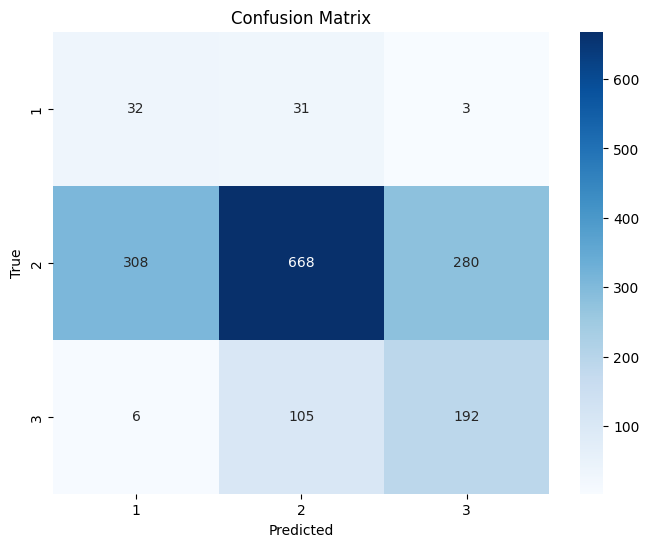

accuracy for class 1: 0.485
accuracy for class 2: 0.532
accuracy for class 3: 0.634

Evaluating the model on the train set...
accuracy on train set:  0.6000537923614847
precision on train set:  0.6204954784538336
recall on train set:  0.6000537923614847
f1 score on train set:  0.6069448544701584
balanced accuracy on train set:  0.6000537923614847
logistic loss on train set:  0.09358766794458794
mse on train set:  0.44970414201183434

Scorecard table:
                 Feature                                         Bin    Points
0          fixed_acidity                     [3.8, 7.40051494526765[  0.042967
1          fixed_acidity      [7.40051494526765, 10.303001959862065[ -0.063256
2          fixed_acidity                  [10.303001959862065, 15.6[  0.195742
3          fixed_acidity                                 [15.6, inf[  0.002108
4       volatile_acidity                  [0.08, 0.2295787693295491[  0.042967
5       volatile_acidity   [0.2295787693295491, 0.42000542173916977[ -0

In [12]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_adaptivelasso_model, wine_caim_diffcod_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

Number of observations after SMOTE:  11154
Number of classes after SMOTE:  3
Target distribution after SMOTE:  quality
Medium    3718
Good      3718
Bad       3718
Name: count, dtype: int64
testing parameters: {'C': 1000.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3911591053902109
testing parameters: {'C': 100.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.45041994882545777
testing parameters: {'C': 10.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5173919073471447
testing parameters: {'C': 2.5}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5357717285779467
testing parameters: {'C': 1.6666666666666667}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5060069184121821
testing parameters: {'C': 1.1111111111111112}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.42908414453491667
testing parameters: {'C': 1.0101010101010102}
  fold  1
  fold  2
  fold  3
  fold  4
  

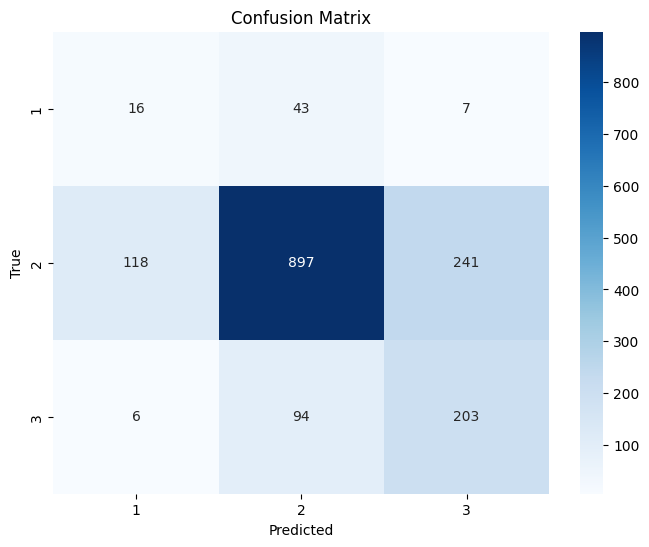

accuracy for class 1: 0.242
accuracy for class 2: 0.714
accuracy for class 3: 0.670

Evaluating the model on the train set...
accuracy on train set:  0.9403801326878249
precision on train set:  0.940796596355577
recall on train set:  0.9403801326878249
f1 score on train set:  0.9399904856214777
balanced accuracy on train set:  0.9403801326878249
logistic loss on train set:  0.11011938577570592
mse on train set:  0.05988882911959835
Execution time: 2133.778829097748 seconds


In [13]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_ml_model, wine_infbins_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS', 
                    encoding_method='1_OUT_OF_K',
                    model_method='ML',
                    use_sbc=True,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_mm_model, wine_infbins_1ook_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='MM',
                    use_sbc=True,
                    mapping=mapping)
scorecard.evaluate()   

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Number of observations after SMOTE:  11154
Number of classes after SMOTE:  3
Target distribution after SMOTE:  quality
Medium    3718
Good      3718
Bad       3718
Name: count, dtype: int64
testing parameters: {'C': 0.0009765625}
  fold  1


In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_beyondl1_model, wine_infbins_1ook_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='BEYOND_L1',
                    use_sbc=True,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_adaptivelasso_model, wine_infbins_1ook_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='ADAPTIVE_LASSO',
                    use_sbc=True,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_ml_model, wine_infbins_diffcod_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_mm_model, wine_infbins_diffcod_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_beyondl1_model, wine_infbins_diffcod_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_adaptivelasso_model, wine_infbins_diffcod_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()